# Importing necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading Ratings Dataset

In [2]:
ratings = pd.read_csv(r'C:\Users\fgfhf\Desktop\BRS\Ratings.csv')
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


# Loading Users Dataset

In [3]:
users = pd.read_csv(r'C:\Users\fgfhf\Desktop\BRS\Users.csv')
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


# Loading Books Dataset

In [4]:
books = pd.read_csv(r'C:\Users\fgfhf\Desktop\BRS\Books.csv')
books.head()

C:\Users\fgfhf\AppData\Local\Temp\ipykernel_19444\938452933.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv(r'C:\Users\fgfhf\Desktop\BRS\Books.csv')


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


# Dimension  of the Dataset

In [5]:
print("Dimension of Books Dataset = ",books.shape)
print("Dimension of Ratings Dataset = ",ratings.shape)
print("Dimension of Users Dataset = ",users.shape)

Dimension of Books Dataset =  (271360, 8)
Dimension of Ratings Dataset =  (1149780, 3)
Dimension of Users Dataset =  (278858, 3)


# Performing EDA on the Datasets

In [6]:
print("Checking the sum of null values in Books Dataset")
books.isnull().sum()

Checking the sum of null values in Books Dataset


ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

We wil drop the rows where Book-Author and Publisher is missing

In [7]:
# Dropping the rows where Book Author is missing
books.dropna(subset='Book-Author',inplace=True)
# Dropping the rows where Publisher is missing
books.dropna(subset='Publisher',inplace=True)

In [8]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [9]:
print("Checking the sum of null values in Users Dataset")
users.isnull().sum()

Checking the sum of null values in Users Dataset


User-ID          0
Location         0
Age         110762
dtype: int64

### Imputing missing values in Users Dataset
- There are three main missing value imputation techniques – mean, median and mode
- We will decide which technique should be used by drawing boxplots and distplots.

### Deciding Factors
>- Mean imputation is often used when the missing values are numerical and the distribution of the variable is 
  approximately normal.
>- Median imputation is preferred when the distribution is skewed, as the median is less sensitive to outliers than the
  mean.
>- Mode imputation is suitable for categorical variables or numerical variables with a small number of unique  
  values.                 

In [10]:
# Checking the dispersion of Datas
users.describe().T

,count,mean,std,min,25%,50%,75%,max
User-ID,278858.0,139429.500000,80499.515020,1.0,69715.25,139429.5,209143.75,278858.0
Age,168096.0,34.751434,14.428097,0.0,24.00,32.0,44.00,244.0


In [11]:
users.Age.value_counts().sort_values(ascending=False)

24.0     5687
25.0     5618
26.0     5547
23.0     5456
27.0     5383
         ... 
107.0       1
208.0       1
223.0       1
207.0       1
127.0       1
Name: Age, Length: 165, dtype: int64

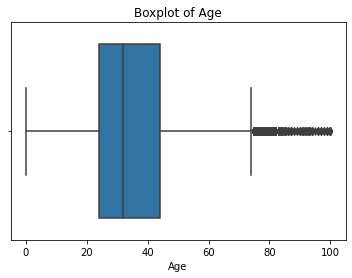

C:\Users\fgfhf\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


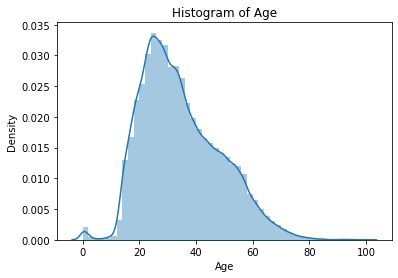

In [12]:
# Filter out the rows where the Age column value is greater than 100
users= users[users['Age'] <= 100]
users.reset_index(drop=True, inplace=True)

# Create a boxplot
sns.boxplot(x=users['Age'])
plt.title('Boxplot of Age')
plt.show()

# Create a distplot
sns.distplot(users['Age'], kde=True)
plt.title('Histogram of Age')
plt.show()

In [13]:
print('The median of Age column = ',users.Age.median())
print('The mean of Age column = ',users.Age.mean())
print('The mode of Age column = ',users.Age.mode())

The median of Age column =  32.0
The mean of Age column =  34.56836582602993
The mode of Age column =  0    24.0
Name: Age, dtype: float64


#### By looking at the above analysis we came to decision that the best technique for imputing Data is to replace the missing values in age by median

In [14]:
median_user= users.Age.median()
users['Age'] = users['Age'].fillna(users['Age'].median())

C:\Users\fgfhf\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


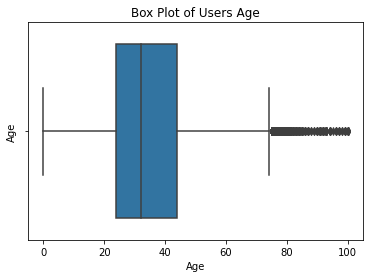

C:\Users\fgfhf\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


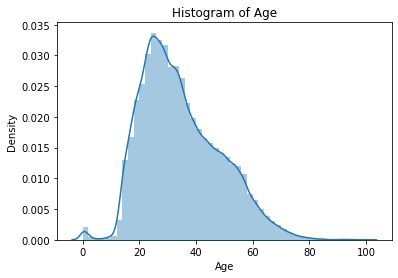

In [15]:
# Creating Box Plot
plt.title("Box Plot of Users Age")
plt.ylabel("Age")
sns.boxplot(users.Age)
plt.show()

# Creating Distplot
sns.distplot(users['Age'], kde=True)
plt.title('Histogram of Age')
plt.show()

In [16]:
print("Checking the sum of null values in Ratings Dataset")
ratings.isnull().sum()

Checking the sum of null values in Ratings Dataset


User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

# Checking for duplicated values in each dataset

In [17]:
# Printing the sum of  Dupliate values
print("Sum of Duplicated values in Books Dataset = ",books.duplicated().sum())
print("Sum of Duplicated values in Ratings Dataset = ",ratings.duplicated().sum())
print("Sum of Duplicated values in Users Dataset = ",users.duplicated().sum())

Sum of Duplicated values in Books Dataset =  0
Sum of Duplicated values in Ratings Dataset =  0
Sum of Duplicated values in Users Dataset =  0


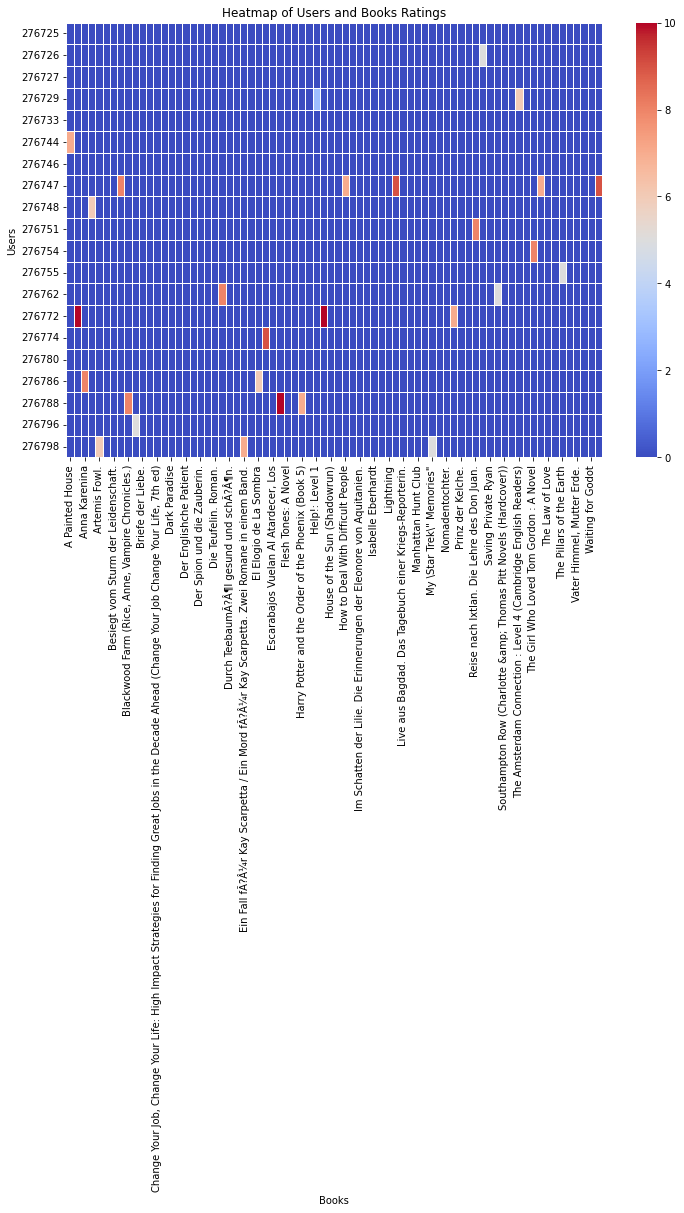

In [43]:
ratings_subset = ratings.head(100)  

ratings_books = pd.merge(ratings_subset, books[['ISBN', 'Book-Title']], on='ISBN')

pivot_table = ratings_books.pivot_table(index='User-ID', columns='Book-Title', values='Book-Rating', fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='coolwarm', linewidths=1)
plt.title('Heatmap of Users and Books Ratings')
plt.xlabel('Books')
plt.ylabel('Users')
plt.show()

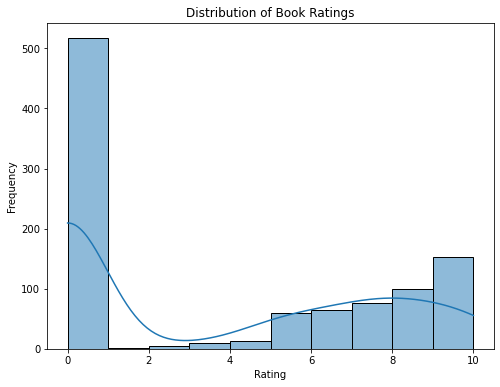

In [44]:
#Histogram of Book Ratings: Shows the distribution of book ratings among the subset of data
ratings = ratings.head(1000)

plt.figure(figsize=(8, 6))
sns.histplot(ratings['Book-Rating'], bins=10, kde=True)
plt.title('Distribution of Book Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

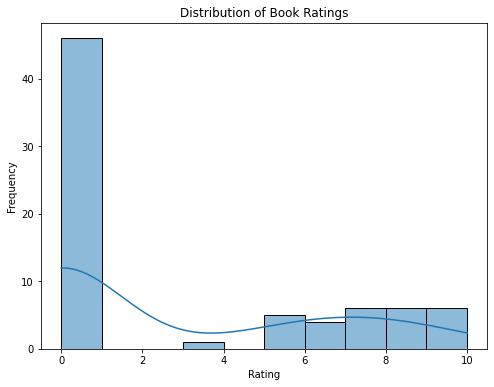

In [45]:
#Histogram of Book Ratings: Shows the distribution of book ratings among the subset of data.
plt.figure(figsize=(8, 6))
sns.histplot(ratings_books['Book-Rating'], bins=10, kde=True)
plt.title('Distribution of Book Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

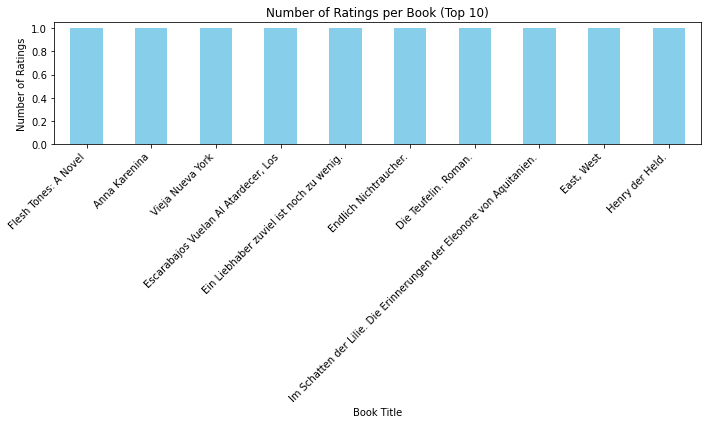

In [46]:
#Bar Chart - Number of Ratings per Book: Displays the top 10 books with the most ratings.
ratings_per_book = ratings_books['Book-Title'].value_counts().head(10)  # Top 10 books with most ratings
plt.figure(figsize=(10, 6))
ratings_per_book.plot(kind='bar', color='skyblue')
plt.title('Number of Ratings per Book (Top 10)')
plt.xlabel('Book Title')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

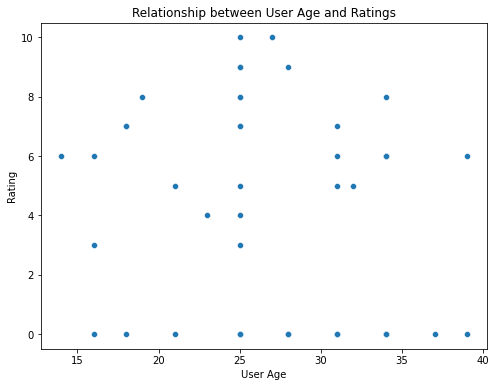

In [47]:
#Scatter Plot - Relationship between User Age and Ratings: Explores the relationship between user age and their ratings.
merged_data = pd.merge(ratings_subset, users[['User-ID', 'Age']], on='User-ID')

plt.figure(figsize=(8, 6))
sns.scatterplot(data=merged_data, x='Age', y='Book-Rating')
plt.title('Relationship between User Age and Ratings')
plt.xlabel('User Age')
plt.ylabel('Rating')
plt.show()

## Popularity Based Recommender System

In [18]:
# Merging two DataFrames (Books and Ratings) using the common column 'ISBN'.
ratings_with_name = ratings.merge(books,on='ISBN')
ratings_with_name

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...,...,...
1031128,276688,0517145553,0,Mostly Harmless,Douglas Adams,1995,Random House Value Pub,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...
1031129,276688,1575660792,7,Gray Matter,Shirley Kennett,1996,Kensington Publishing Corporation,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...
1031130,276690,0590907301,0,Triplet Trouble and the Class Trip (Triplet Tr...,Debbie Dadey,1997,Apple,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...
1031131,276704,0679752714,0,A Desert of Pure Feeling (Vintage Contemporaries),Judith Freeman,1997,Vintage Books USA,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...


In [19]:
num_rating_df = ratings_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating_df.rename(columns={'Book-Rating':'num_ratings'},inplace=True)
num_rating_df

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241064,Ã?Â?lpiraten.,2
241065,Ã?Â?rger mit Produkt X. Roman.,4
241066,Ã?Â?sterlich leben.,1
241067,Ã?Â?stlich der Berge.,3


In [20]:
df2=ratings_with_name.groupby('Book-Title')[['Book-Rating']].count()
rating_count_20=df2.head(20)
rating_count_20.head()

,Book-Rating
Book-Title,
"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",4
Always Have Popsicles,1
Apple Magic (The Collector's series),1
"Ask Lily (Young Women of Faith: Lily Series, Book 5)",1
Beyond IBM: Leadership Marketing and Finance for the 1990s,1


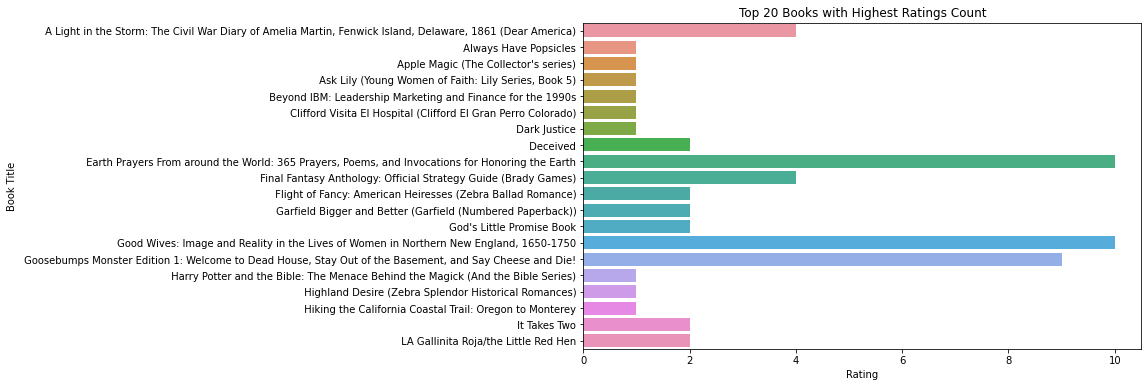

In [21]:
rating_count_20= rating_count_20.reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Book-Rating', y='Book-Title', data=rating_count_20)
plt.title('Top 20 Books with Highest Ratings Count')
plt.xlabel('Rating')
plt.ylabel('Book Title')
plt.show()

In [22]:
avg_rating_df = ratings_with_name.groupby('Book-Title').mean()['Book-Rating'].reset_index()
avg_rating_df.rename(columns={'Book-Rating':'avg_rating'},inplace=True)
avg_rating_df

,Book-Title,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241064,Ã?Â?lpiraten.,0.000000
241065,Ã?Â?rger mit Produkt X. Roman.,5.250000
241066,Ã?Â?sterlich leben.,7.000000
241067,Ã?Â?stlich der Berge.,2.666667


In [23]:
popular_df = num_rating_df.merge(avg_rating_df,on='Book-Title')
popular_df

,Book-Title,num_ratings,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241064,Ã?Â?lpiraten.,2,0.000000
241065,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241066,Ã?Â?sterlich leben.,1,7.000000
241067,Ã?Â?stlich der Berge.,3,2.666667


In [24]:
popular_df = popular_df[popular_df['num_ratings']>=250].sort_values('avg_rating',ascending=False).head(50)
popular_df.head(20)

,Book-Title,num_ratings,avg_rating
80434,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
80422,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
80441,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
80426,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
80414,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
191611,The Hobbit : The Enchanting Prelude to The Lor...,281,5.007117
187376,The Fellowship of the Ring (The Lord of the Ri...,368,4.948370
80445,Harry Potter and the Sorcerer's Stone (Harry P...,575,4.895652
211383,"The Two Towers (The Lord of the Rings, Part 2)",260,4.880769
219740,To Kill a Mockingbird,510,4.700000


In [25]:
popular_df = popular_df.merge(books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-M','num_ratings','avg_rating']]

## Collaborative Filtering Based Recommender System

In [26]:
x = ratings_with_name.groupby('User-ID').count()['Book-Rating'] > 200
padhe_likhe_users = x[x].index
padhe_likhe_users

Int64Index([   254,   2276,   2766,   2977,   3363,   4017,   4385,   6251,
              6323,   6543,
            ...
            271705, 273979, 274004, 274061, 274301, 274308, 275970, 277427,
            277639, 278418],
           dtype='int64', name='User-ID', length=811)

In [27]:
filtered_rating = ratings_with_name[ratings_with_name['User-ID'].isin(padhe_likhe_users)]

In [28]:
y = filtered_rating.groupby('Book-Title').count()['Book-Rating']>=50
famous_books = y[y].index

In [29]:
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]

In [30]:
pt = final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Bend in the Road,0.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,9.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [31]:
pt.fillna(0,inplace=True)

In [32]:
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
from sklearn.metrics.pairwise import cosine_similarity

In [34]:
similarity_scores = cosine_similarity(pt)


In [35]:
similarity_scores.shape

(706, 706)

In [36]:
def recommend(book_name):
    # index fetch
    index = np.where(pt.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:5]
    
    data = []
    for i in similar_items:
        item = []
        temp_df = books[books['Book-Title'] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))
        
        data.append(item)
    
    return data

# Recommending on the basis of Year of Publication

In [37]:
recommend('1984')

[['Animal Farm',
  'George Orwell',
  'http://images.amazon.com/images/P/0451526341.01.MZZZZZZZ.jpg'],
 ["The Handmaid's Tale",
  'Margaret Atwood',
  'http://images.amazon.com/images/P/0449212602.01.MZZZZZZZ.jpg'],
 ['Brave New World',
  'Aldous Huxley',
  'http://images.amazon.com/images/P/0060809833.01.MZZZZZZZ.jpg'],
 ['The Vampire Lestat (Vampire Chronicles, Book II)',
  'ANNE RICE',
  'http://images.amazon.com/images/P/0345313860.01.MZZZZZZZ.jpg']]

In [38]:
pt.index[545]

"The Handmaid's Tale"

In [39]:
import pickle
pickle.dump(popular_df,open('popular.pkl','wb'))

In [40]:
books.drop_duplicates('Book-Title')

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271354,0449906736,Flashpoints: Promise and Peril in a New World,Robin Wright,1993,Ballantine Books,http://images.amazon.com/images/P/0449906736.0...,http://images.amazon.com/images/P/0449906736.0...,http://images.amazon.com/images/P/0449906736.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [41]:
pickle.dump(pt,open('pt.pkl','wb'))
pickle.dump(books,open('books.pkl','wb'))
pickle.dump(similarity_scores,open('similarity_scores.pkl','wb'))

# Recommending on the basis of Book Title

In [42]:
recommend('Animal Farm')

[['1984',
  'George Orwell',
  'http://images.amazon.com/images/P/0451524934.01.MZZZZZZZ.jpg'],
 ['Angus, Thongs and Full-Frontal Snogging: Confessions of Georgia Nicolson',
  'Louise Rennison',
  'http://images.amazon.com/images/P/0064472272.01.MZZZZZZZ.jpg'],
 ['Midnight',
  'Dean R. Koontz',
  'http://images.amazon.com/images/P/0425118703.01.MZZZZZZZ.jpg'],
 ['Second Nature',
  'Alice Hoffman',
  'http://images.amazon.com/images/P/0399139087.01.MZZZZZZZ.jpg']]

# Random Forest

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score

le = LabelEncoder()
ratings_books['Book-Title_Encoded'] = le.fit_transform(ratings_books['Book-Title'])

X = ratings_books[['User-ID', 'Book-Title_Encoded']]
y = ratings_books['Book-Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

predictions = model.predict(X_test)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")



Mean Squared Error: 9.645606666666664


# Linear Regression

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score

le = LabelEncoder()
ratings_books['Book-Title_Encoded'] = le.fit_transform(ratings_books['Book-Title'])

X = ratings_books[['User-ID', 'Book-Title_Encoded']]
y = ratings_books['Book-Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

predictions_linear = linear_model.predict(X_test)

mse_linear = mean_squared_error(y_test, predictions_linear)
print(f"Linear Regression Mean Squared Error: {mse_linear}")

r2 = r2_score(y_test, predictions_linear)
print(f"R-squared: {r2}")

Linear Regression Mean Squared Error: 14.79667777885003
R-squared: -0.11123247671604064
